## IBM Stock Analysis using RNN model
Github: https://github.com/TrangNguyen95/NeuralNetwork

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.utils import shuffle

### Import Data

In [2]:
dataset=pd.read_csv('IBM.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-30,206.710007,207.960007,206.320007,207.080002,171.139999,2773200
1,2012-05-01,207.179993,208.929993,206.710007,208.000000,171.900360,2715900
2,2012-05-02,206.970001,208.270004,206.910004,208.059998,171.949890,2360300
3,2012-05-03,208.270004,208.919998,206.550003,207.240005,171.272232,2826600
4,2012-05-04,206.470001,207.110001,204.399994,204.990005,169.412750,4023600


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date         1509 non-null object
Open         1509 non-null float64
High         1509 non-null float64
Low          1509 non-null float64
Close        1509 non-null float64
Adj Close    1509 non-null float64
Volume       1509 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


### EDA

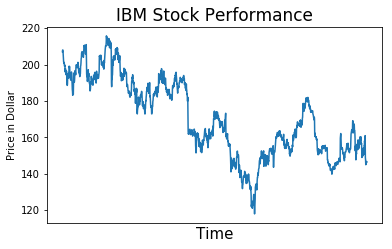

In [5]:
import matplotlib.dates as mdates
plt.plot(dataset['Date'],dataset['Close'])
plt.title('IBM Stock Performance',fontsize=17)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.xlabel('Time',fontsize=15)
plt.ylabel('Price in Dollar',fontsize=10)
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

### Trainning the data

In [6]:
#last 100 rows will be tested
dataset_train=dataset.iloc[:-100,]
dataset_test=dataset.iloc[-100:,]

In [9]:
#transform data to array
training_set=dataset_train['Close'].values.reshape(-1,1)

In [107]:
#Don't know if need this line
# transform str to float, else, won't be able to run fit_transform
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [62]:
#Don't know if need this line
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
#looking at Close column
#training_set=dataset['Close'].values.reshape(-1,1)


In [56]:
#training_set

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)


creating a data structure with 60 time step and reshape it to 3 dimension to include the time step as the 3rd dimension. 

In [11]:
X_train=[]
y_train=[]
for i in range (60,1207):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [12]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

### RNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
regressor=Sequential()

In [15]:
regressor.add(LSTM(units=50,return_sequences= True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(Dense(units=1))

In [20]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [21]:
regressor.fit(X_train,y_train, epochs=100,batch_size=32)

Epoch 1/100
1147/1147 [==============================] - 11s 9ms/step - loss: 0.0564
Epoch 2/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0105
Epoch 3/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0088
Epoch 4/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0083
Epoch 5/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0076
Epoch 6/100
1147/1147 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 7/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0067
Epoch 8/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0070
Epoch 9/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0062
Epoch 10/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0058
Epoch 11/100
1147/1147 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 12/100
1147/1147 [==============================] - 6s 6ms/step - l

1147/1147 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 98/100
1147/1147 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 99/100
1147/1147 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 100/100
1147/1147 [==============================] - 6s 5ms/step - loss: 0.0018


In [49]:
Real_stock=dataset.iloc[-20:,]
real_stock_price=Real_stock['Close'].values

In [51]:
dataset_total=pd.concat((dataset_train['Close'],dataset_test['Close']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [52]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

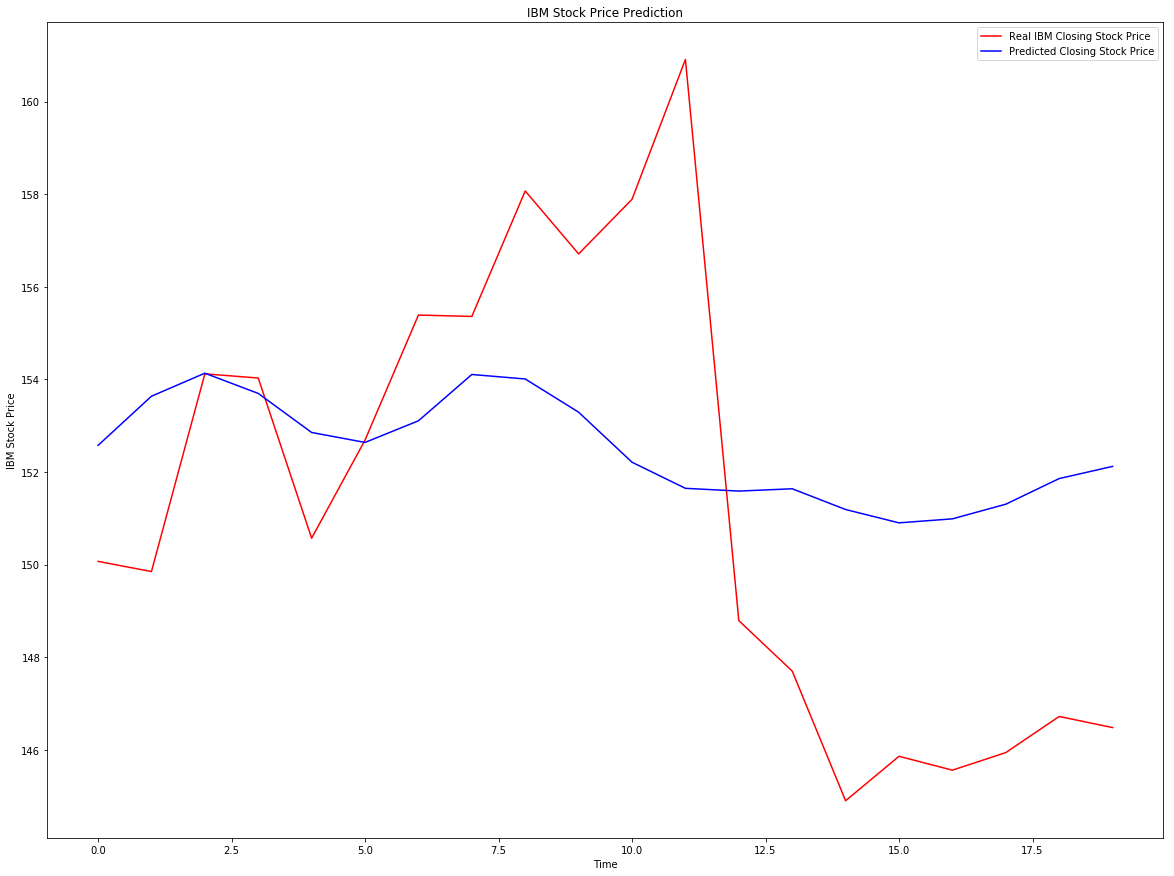

In [54]:
plt.plot(real_stock_price,color='red',label='Real IBM Closing Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Closing Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()